In [1]:
import face_recognition
import os, sys
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import glob

In [3]:
riot_video_path = "/Users/user/Desktop/2023python/facerecognition/BLMriots.mov"

In [112]:
riot_video_path2 = "/Users/user/Desktop/2023python/facerecognition/riots2.mov"

In [2]:
haarcascades_path = "/Users/user/Desktop/2023python/facerecognition/Haarcascades\haarcascade_frontalface_alt.xml"

In [65]:
image_riot ="/Users/user/Desktop/2023python/facerecognition/riots_image2.png"

In [29]:
cd facerecognition/Haarcascades

/Users/user/Desktop/2023python/facerecognition/Haarcascades


In [36]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

In [47]:
savepath ="riotfaces/"

In [110]:
def grabfaces(image,savepath,n):
    img= image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)
    print('Number of detected faces:', len(faces))
    if len(faces) > 0:
        for i, (x,y,w,h) in enumerate(faces):
            face = img[y:y+h, x:x+w]
            print(face.shape)
            if face.shape[0]>70 and face.shape[1]>70:
                print("bigface")
                img_resize= cv2.resize(face,(200,200),interpolation = cv2.INTER_AREA)
                cv2.imwrite("riotfaces2/" + f'face{n}.jpg', img_resize, )
               


In [113]:
cap = cv2.VideoCapture(riot_video_path2)
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
n=1 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    #check every 100 frame 3 sec
    if n % 100 == 0:
        # Display the resulting frame
        print(frame.shape)
        grabfaces(frame,savepath,n)
        #cv2.imshow('Frame',frame)
    n += 1
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

(476, 850, 3)
Number of detected faces: 2
(22, 22, 3)
(23, 23, 3)
(476, 850, 3)
Number of detected faces: 3
(22, 22, 3)
(22, 22, 3)
(34, 34, 3)
(476, 850, 3)
Number of detected faces: 5
(46, 46, 3)
(51, 51, 3)
(54, 54, 3)
(52, 52, 3)
(52, 52, 3)
(476, 850, 3)
Number of detected faces: 4
(38, 38, 3)
(46, 46, 3)
(51, 51, 3)
(51, 51, 3)
(476, 850, 3)
Number of detected faces: 4
(50, 50, 3)
(57, 57, 3)
(51, 51, 3)
(58, 58, 3)
(476, 850, 3)
Number of detected faces: 5
(50, 50, 3)
(54, 54, 3)
(52, 52, 3)
(52, 52, 3)
(57, 57, 3)
(476, 850, 3)
Number of detected faces: 6
(45, 45, 3)
(51, 51, 3)
(48, 48, 3)
(55, 55, 3)
(61, 61, 3)
(53, 53, 3)
(476, 850, 3)
Number of detected faces: 6
(48, 48, 3)
(50, 50, 3)
(51, 51, 3)
(51, 51, 3)
(53, 53, 3)
(46, 46, 3)


In [105]:
detected_faces= glob.glob("/Users/user/Desktop/2023python/facerecognition/Haarcascades/riotfaces/*.jpg")

In [114]:
detected_faces2= glob.glob("/Users/user/Desktop/2023python/facerecognition/Haarcascades/riotfaces2/*.jpg")

In [106]:
print("No of protesters: ", len(detected_faces))

No of protesters:  36


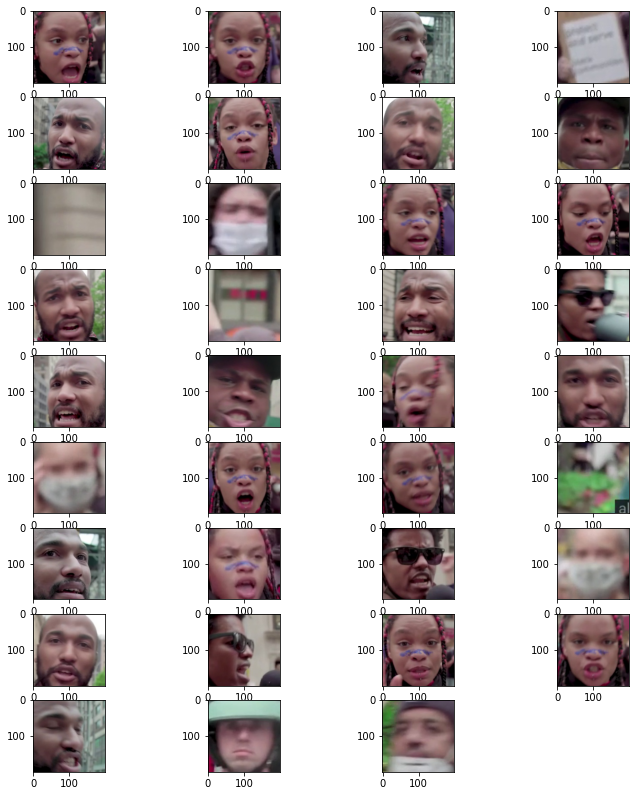

In [107]:
no_rows= int(len(detected_faces)/4)
plt.figure(figsize=(12,no_rows+5))

for i in range(1, len(detected_faces)):
    eg=plt.imread(detected_faces[i])
    plt.subplot(no_rows, 4, i)
    plt.imshow(eg)
plt.show()